In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
from scipy.special import expit
%matplotlib inline

file_name = './historic_data/BTC-USD_300_10000.csv'
window = 288 # 1 day

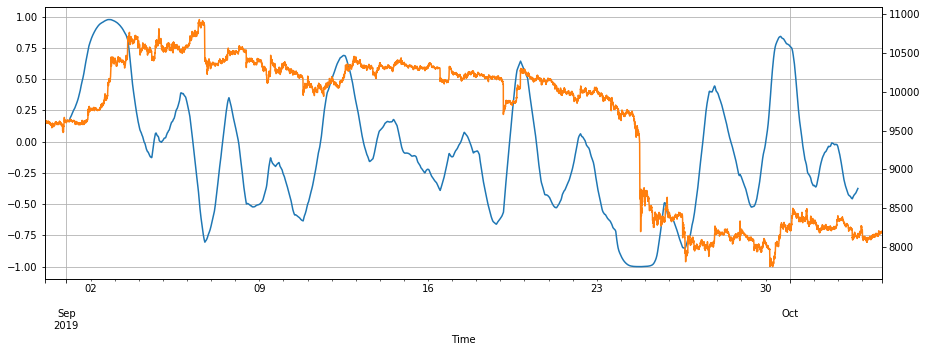

In [12]:
# Read csv, use Time column as a datetime index, and sort by this index
df = pd.read_csv(file_name, index_col='Time', parse_dates=True, infer_datetime_format=True).sort_index()
# Calculate the Oracle stance
df['Stance'] = np.tanh(df['Close'].rolling(window=window,center=True).mean().diff().rolling(window=window,center=True).mean())

df.Stance.plot(figsize=(15, 5))
df.Close.plot(figsize=(15, 5), secondary_y=True, grid=True)

In [18]:
def load_and_stance(file_name, window):
    # Read csv, use Time column as a datetime index, and sort by this index
    df = pd.read_csv(file_name, index_col='Time', parse_dates=True, infer_datetime_format=True).sort_index()
    # Calculate the Oracle stance
    df['Stance'] = np.tanh(df['Close'].rolling(window=window,center=True).mean().diff().rolling(window=window,center=True).mean())
    return df
    

In [26]:
def strategy_performance(prices, stances, fee_percent=0.25):
    fiat_balance = 1.0
    last_price = prices[0]
    last_position = False
    for price, stance in zip(prices, stances):
        if not stance:
            continue
            
        position = stance > 0.0
        
        # Fees
        if last_position != position:
            fiat_balance *= 1.0 - (fee_percent / 100.0)
        
        # Update balance if we have a position
        if position:
            delta = (price - last_price) / last_price
            fiat_balance *= 1.0 + delta
        
        last_price = price
        last_position = position
        
    return fiat_balance

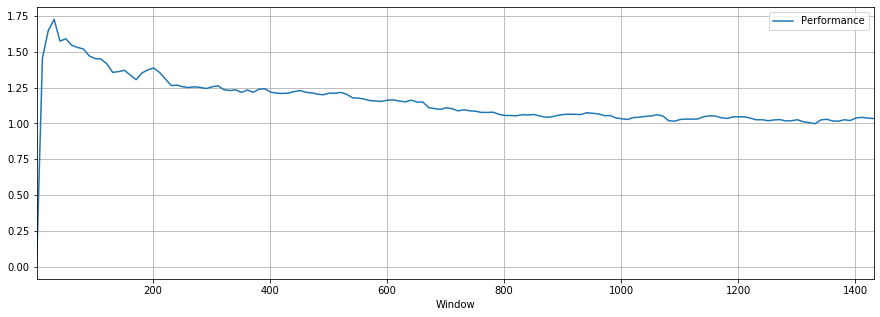

In [30]:
windows = range(1,1440,10)
performances = []
for window in windows:
    df = load_and_stance(file_name, window)
    performance = strategy_performance(df.Close, df.Stance)
    performances.append(performance)
    
df = pd.DataFrame(list(zip(windows, performances)), columns=['Window', 'Performance'])
    
df.plot(x='Window', y='Performance', figsize=(15, 5), grid=True)

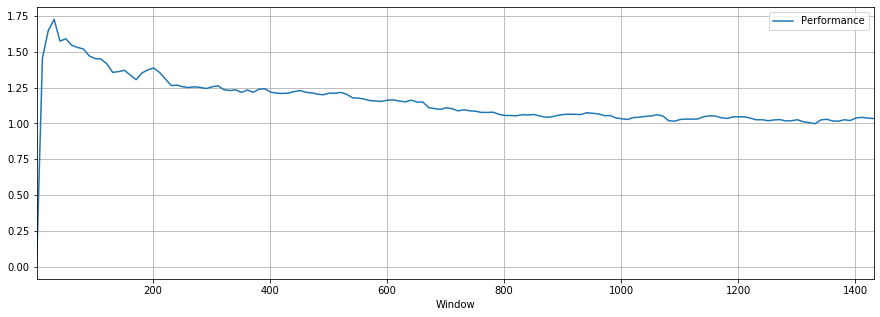

In [31]:
df.plot(x='Window', y='Performance', figsize=(15, 5), grid=True)

#Ideas

*Incorporate long and short posistions into the performance analysis
 *Need to go from signal -> long, short, out position

*Take existing code for indicators and make it generate signals that we can use here
*Implement DeMark indicators